# 4. Rogistic Regression

## 공부 시간에 따른 자격증 합격 가능성 (합격/불합격 분류)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('LogisticRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### 데이터 분리

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [8]:
print(lr.predict([[6]])) #6시간 공부했을 때 합격 여부(0:불합격, 1:합격)
print(lr.predict_proba([[6]])) #6시간 공부했을 떄 [불합격(0) 확률, 합격(1) 확률]

[1]
[[0.14150735 0.85849265]]


### 분류 결과 예측(test set)

In [9]:
y_pred = lr.predict(X_test)
y_pred, y_test

(array([1, 0, 1, 1], dtype=int64), array([1, 0, 1, 0], dtype=int64))

In [10]:
lr.score(X_test, y_test)

0.75

### 데이터 시각화

In [17]:
X_range = np.arange(min(X), max(X), 0.1)
p = 1 / (1 + np.exp(-(lr.coef_ * X_range + lr.intercept_)))
p

array([[0.01035705, 0.01161247, 0.01301807, 0.0145913 , 0.01635149,
        0.01832008, 0.02052073, 0.02297953, 0.02572521, 0.02878929,
        0.03220626, 0.03601375, 0.04025264, 0.04496719, 0.05020505,
        0.05601722, 0.06245802, 0.06958479, 0.07745757, 0.08613861,
        0.09569165, 0.10618106, 0.11767067, 0.13022241, 0.14389468,
        0.15874043, 0.17480509, 0.19212422, 0.2107211 , 0.23060425,
        0.25176509, 0.27417574, 0.29778732, 0.32252874, 0.34830616,
        0.3750034 , 0.40248315, 0.43058927, 0.45914989, 0.48798142,
        0.51689314, 0.54569221, 0.57418876, 0.60220088, 0.6295591 ,
        0.65611024, 0.68172044, 0.70627722, 0.72969059, 0.75189324,
        0.77283994, 0.79250621, 0.81088652, 0.82799203, 0.84384828,
        0.85849265, 0.871972  , 0.88434036, 0.89565683, 0.90598377,
        0.91538521, 0.92392546, 0.93166808, 0.93867499, 0.9450058 ,
        0.95071738, 0.95586346, 0.96049453, 0.96465764, 0.96839647,
        0.97175136, 0.97475939, 0.97745455, 0.97

In [18]:
p = p.reshape(-1) #1차원 배열 형태로 변경
p.shape

(95,)

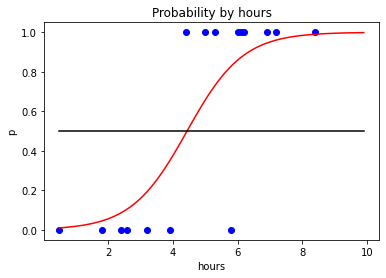

In [24]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_range, p, color = 'red')
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'black')
plt.title('Probability by hours')
plt.xlabel('hours')
plt.ylabel('p')
plt.show()

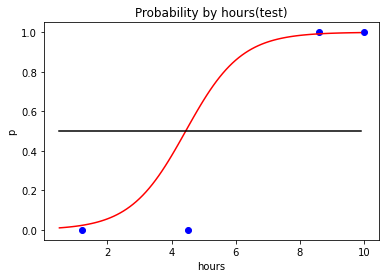

In [25]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_range, p, color = 'red')
plt.plot(X_range, np.full(len(X_range), 0.5), color = 'black')
plt.title('Probability by hours(test)')
plt.xlabel('hours')
plt.ylabel('p')
plt.show()

### Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

#[True Negative, False Positive],
#[False Negative, True Positive]

array([[1, 1],
       [0, 2]], dtype=int64)